In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn import Parameter
import math
import numpy as np
import collections
from sklearn import metrics
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.optimize import linear_sum_assignment as linear_assignment
from torchvision import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
import scipy.io as scio
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import KFold
import torch.utils.data as data
from torch.optim.lr_scheduler import StepLR
import torch.nn.functional as F
import argparse

from VAE_gamma import BasicDataset, generate_gamma, cluster_acc, EarlyStopping, VAE_gamma, pretrain_fit, train_model, cv_result



data_x = scio.loadmat('/home/jupyter-heojw/chowdary104.mat')
data_y = scio.loadmat('/home/jupyter-heojw/class_chowdary.mat')


chowdary104 = data_x['chowdary']
label = data_y['class_chowdary'].reshape(104)

label[label==1] = 0
label[label==2] = 1

x_data = chowdary104
y_data = label

train_dataset = BasicDataset(x_data,y_data)
test_dataset = BasicDataset(x_data,y_data)


device = torch.device('cuda:5')


dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=26, shuffle=True, drop_last=True)
dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

dataset_sizes = len(train_dataset)

latent_dim_list = [1]

num_cluster_list = [1,2,3]


# latent_dim_list = [1,2,4,6,8,10,12,14,16,18]

# num_cluster_list = [1,2,3]

n_pre=5


from tqdm import tqdm

dict_list = {}
monte_number = 1
for k in tqdm(num_cluster_list):
    for j in tqdm(latent_dim_list):
        model = VAE_gamma(data_dim=182, latent_dim=j, device=device, encodeLayer=[200,100,30], decodeLayer=[30,100,200], num_cluster=k)
        loss_list = cv_result(model, x_data, y_data, 26, 1, 123, '/home/jupyter-heojw/VAE-gamma/pretrain/chowdary', j, k, device, 
                              initial_num=n_pre, n_splits=5, pretrain_epoch=1, epoch_train=1,shuffle=True)
        dict_list.update(loss_list)
        loss_list = np.array(list(dict_list.items()))[:,1].astype('float')
        np.save('/home/jupyter-heojw/VAE-gamma/pretrain/loss_list/gamma_bhatta_save.npy', loss_list)      

  0%|          | 0/1 [00:00<?, ?it/s]

Accurasy: 58.97435897435897
ARI: 0.0
***** Test Result: loss: 148.112 acc: 61.9048
Accurasy: 58.97435897435897
ARI: 0.0
***** Test Result: loss: 124.272 acc: 61.9048
Accurasy: 58.97435897435897
ARI: 0.0
***** Test Result: loss: 104.860 acc: 61.9048
Accurasy: 60.256410256410255
ARI: 0.0
***** Test Result: loss: 102.862 acc: 61.9048
Accurasy: 56.41025641025641
ARI: 0.0
***** Test Result: loss: 99.352 acc: 61.9048
Accurasy: 61.53846153846154
ARI: 0.0
***** Test Result: loss: 100.283 acc: 52.3810
Accurasy: 61.53846153846154
ARI: 0.0
***** Test Result: loss: 97.536 acc: 52.3810
Accurasy: 62.82051282051282
ARI: 0.0
***** Test Result: loss: 95.283 acc: 52.3810
Accurasy: 61.53846153846154
ARI: 0.0
***** Test Result: loss: 92.252 acc: 52.3810
Accurasy: 61.53846153846154
ARI: 0.0
***** Test Result: loss: 89.813 acc: 52.3810
Accurasy: 58.97435897435897
ARI: 0.0
***** Test Result: loss: 85.046 acc: 71.4286
Accurasy: 56.41025641025641
ARI: 0.0
***** Test Result: loss: 82.966 acc: 71.4286
Accurasy: 


 33%|███▎      | 1/3 [00:27<00:55, 27.89s/it]

Accurasy: 61.53846153846154
ARI: 0.0
***** Test Result: loss: 70.540 acc: 55.0000



  0%|          | 0/1 [00:00<?, ?it/s]

Accurasy: 65.38461538461539
ARI: 0.06056366666174434
***** Test Result: loss: 125.153 acc: 85.7143
Accurasy: 61.53846153846154
ARI: 0.032915129151291515
***** Test Result: loss: 131.544 acc: 71.4286
Accurasy: 65.38461538461539
ARI: 0.06056366666174434
***** Test Result: loss: 128.809 acc: 66.6667
Accurasy: 61.53846153846154
ARI: 0.031914893617021274
***** Test Result: loss: 111.717 acc: 71.4286
Accurasy: 65.38461538461539
ARI: 0.06907325182110294
***** Test Result: loss: 129.780 acc: 61.9048
Accurasy: 65.38461538461539
ARI: 0.06056366666174434
***** Test Result: loss: 99.597 acc: 61.9048
Accurasy: 67.94871794871794
ARI: 0.07785638618013455
***** Test Result: loss: 101.348 acc: 71.4286
Accurasy: 64.1025641025641
ARI: 0.02307151780137414
***** Test Result: loss: 101.337 acc: 80.9524
Accurasy: 67.94871794871794
ARI: 0.0893158153123616
***** Test Result: loss: 97.590 acc: 76.1905
Accurasy: 65.38461538461539
ARI: 0.06056366666174434
***** Test Result: loss: 97.775 acc: 66.6667
Accurasy: 62.


 67%|██████▋   | 2/3 [00:33<00:14, 14.93s/it]

***** Test Result: loss: 74.814 acc: 55.0000



  0%|          | 0/1 [00:00<?, ?it/s]

Accurasy: 58.97435897435897
ARI: 0.09602429072967075
***** Test Result: loss: 150.094 acc: 71.4286
Accurasy: 56.41025641025641
ARI: -0.00683371298405467
***** Test Result: loss: 126.917 acc: 61.9048
Accurasy: 60.256410256410255
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 104.336 acc: 61.9048
Accurasy: 61.53846153846154
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 97.852 acc: 61.9048
Accurasy: 60.256410256410255
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 94.087 acc: 61.9048
Accurasy: 60.256410256410255
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 92.350 acc: 52.3810
Accurasy: 61.53846153846154
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 88.504 acc: 52.3810
Accurasy: 62.82051282051282
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 84.497 acc: 52.3810
Accurasy: 58.97435897435897
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 80.936 acc: 52.3810
Accurasy: 61.53846153846154
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 79.480 acc: 52.3810
Accurasy: 56.41025641025641
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 76.005 acc: 71.4286
Accurasy: 56.41025641025641
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 75.439 acc: 71.4286
Accurasy: 57.69230769230769
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 75.979 acc: 71.4286
Accurasy: 60.256410256410255
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 75.306 acc: 71.4286
Accurasy: 57.69230769230769
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 75.971 acc: 71.4286
Accurasy: 57.69230769230769
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 70.027 acc: 66.6667
Accurasy: 55.12820512820513
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 69.777 acc: 66.6667
Accurasy: 56.41025641025641
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 69.684 acc: 66.6667
Accurasy: 58.97435897435897
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 69.665 acc: 66.6667
Accurasy: 57.69230769230769
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 70.106 acc: 66.6667
Accurasy: 64.1025641025641
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 69.572 acc: 55.0000
Accurasy: 64.1025641025641
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 69.669 acc: 55.0000
Accurasy: 66.66666666666667
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 70.200 acc: 55.0000
Accurasy: 61.53846153846154
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


***** Test Result: loss: 70.028 acc: 55.0000
Accurasy: 65.38461538461539
ARI: 0.0


/home/jupyter-heojw/.conda/envs/jwheo/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)

100%|██████████| 3/3 [00:40<00:00, 13.37s/it]

***** Test Result: loss: 69.772 acc: 55.0000


In [2]:
loss_list = np.array(list(dict_list.items()))[:,1].astype('float')
key_list = np.array(list(dict_list.items()))[:,0]

loss_list = np.nan_to_num(loss_list, nan = np.nanmean(loss_list))

min_loss_list = np.array([])

for i in range(0,len(latent_dim_list)*n_pre*len(num_cluster_list)):
    min_loss_list = np.append(min_loss_list,loss_list[((i*n_pre)):(((i+1)*n_pre))].min()) 

mean_loss_list = np.array([])
for i in range(0,len(latent_dim_list)*len(num_cluster_list)):
    mean_loss_list = np.append(mean_loss_list,min_loss_list[i*n_pre:(i+1)*n_pre].mean())

optimal_list = []
for i in range(0,len(num_cluster_list)):
    index_latent = np.where(mean_loss_list[i*len(latent_dim_list):(i+1)*len(latent_dim_list)]==mean_loss_list[i*len(latent_dim_list):(i+1)*len(latent_dim_list)].min())[0][0]
    optimal_list = np.append(optimal_list,latent_dim_list[index_latent])

print(optimal_list)

cluster_loss_list = np.array([])
for i in range(0,len(num_cluster_list)):
    cluster_loss_list = np.append(cluster_loss_list,mean_loss_list[i*len(latent_dim_list):(i+1)*len(latent_dim_list)].min())

print(cluster_loss_list)

opt_cluster = np.where(cluster_loss_list==cluster_loss_list.min())[0][0]
print(num_cluster_list[opt_cluster])

latent_dim = np.int(optimal_list[np.where(cluster_loss_list==cluster_loss_list.min())[0][0]])
print(latent_dim)


[1. 1. 1.]
[81.74729518 90.34620651 77.62209335]
3
1


In [3]:
latent_dim = latent_dim

In [4]:
batch_size = 26

In [5]:
n_pre=5

In [6]:
train_dataset = BasicDataset(x_data,y_data)
test_dataset = BasicDataset(x_data,y_data)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

In [7]:
from torch.optim.lr_scheduler import StepLR

In [8]:
final_list = {}
for i in range(1, n_pre+1):
#     train_dataset = BasicDataset(X_train,Y_train)
#     test_dataset = BasicDataset(X_test,Y_test)

#     dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last = True)
#     dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True, drop_last = True)        

    if torch.cuda.is_available():
        pre_model =  VAE_gamma(data_dim=182, latent_dim=latent_dim, device=torch.device('cuda:5'), encodeLayer=[200,100,30], decodeLayer=[30,100,200], num_cluster=2).cuda(device)

    patience = 5
    optimizer_auto = optim.Adam(pre_model.parameters(), lr=0.001)      
    scheduler = StepLR(optimizer_auto, step_size=20, gamma= 0.9)
    path_name = './chowdary_pre_true'+ str(latent_dim) +'_'+str(i)+'.pth'
    pretrain_epoch= 1
    pretrain_fit(dataloader, pre_model, optimizer_auto,scheduler,path_name,pretrain_epoch,monte_number,2,device=torch.device('cuda:5'))
    
    if torch.cuda.is_available():
        model_train = VAE_gamma(data_dim=182, latent_dim=latent_dim, device=torch.device('cuda:5'), encodeLayer=[200,100,30], decodeLayer=[30,100,200], num_cluster=2).cuda(device)     
    saveWeightPath = path_name
    optimizer = optim.Adam(model_train.parameters(), lr=0.001)
    scheduler = StepLR(optimizer, step_size=20, gamma= 0.9)
    model_train.load_state_dict(torch.load(saveWeightPath))
    epoch_train=1
    path_name_2 = './chowdary_true' +str(latent_dim) + '_initial' + str(i) +  '.pth'

    loss = train_model(dataloader, dataloader_test, model_train, optimizer,scheduler,epoch_train,batch_size,monte_number,10,device,path_name_2)
    final_list[' initial:'+str(i) + ' dim:' + str(latent_dim) ] = loss

Accurasy: 57.69230769230769
ARI: 0.003932468393165688
***** Test Result: loss: 580.448 acc: 57.6923
Accurasy: 59.61538461538461
ARI: 0.027251149134759275
***** Test Result: loss: 468.384 acc: 66.3462
Accurasy: 58.65384615384615
ARI: 0.019090357880672554
***** Test Result: loss: 555.334 acc: 60.5769
Accurasy: 50.96153846153846
ARI: -0.009075024945863503
***** Test Result: loss: 477.538 acc: 61.5385
Accurasy: 52.88461538461539
ARI: -0.009086406993518937
***** Test Result: loss: 472.359 acc: 59.6154


In [9]:
final_list

{' initial:1 dim:1': 580.4481750488281,
 ' initial:2 dim:1': 468.38441467285156,
 ' initial:3 dim:1': 555.3344177246094,
 ' initial:4 dim:1': 477.538232421875,
 ' initial:5 dim:1': 472.3588562011719}

In [10]:
final_loss = np.array(list(final_list.items()))[:,1].astype('float')
final_loss

array([580.44817505, 468.38441467, 555.33441772, 477.53823242,
       472.3588562 ])

In [11]:
optim_model = np.where(final_loss==final_loss.min())[0][0] + 1 

In [12]:
optim_model

2

In [13]:
path_name_best =  './chowdary_true' +str(latent_dim) + '_initial' + str(optim_model) +  '.pth'

In [14]:
if torch.cuda.is_available():
    model =  VAE_gamma(data_dim=182, latent_dim=latent_dim, device=torch.device('cuda:5'), encodeLayer=[200,100,30], decodeLayer=[30,100,200], num_cluster=2).cuda(device) 

saveWeightPath = path_name_best

# optimizer = optim.Adadelta(model.parameters(), lr=0.001, rho=.95)
model.load_state_dict(torch.load(saveWeightPath))

<All keys matched successfully>

In [15]:
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

In [17]:
model.eval()
accuracy_list = []
test_loss_list = []    
test_loss_sum = 0.0
for perform in range(0,100):
    test_loss = 0.0
    test_running_correct = 0.0
    label_set_test = torch.tensor([],dtype=int).cuda(device)
    preds_set_test = torch.tensor([],dtype=int).cuda(device)
    for batch_idx, data in enumerate(dataloader_test):

        img, label = data 
        img = img.float()
        img = img.view(img.size(0), -1)

        if torch.cuda.is_available():
            img = img.cuda(device)
            label = label.cuda(device).float()

        recon_al,recon_be, logalpha, logbeta, z = model(img)
        monte_gamma = 0
        monte_recon_loss = 0
        for l in range(monte_number):
            z_l = model.reparametrize(logalpha, logbeta)
            m = nn.Softplus()
            recon_al_l = 1e-6 + m(model.decode(z_l)[:,:model.data_dim])
            recon_be_l = 1e-6 + m(model.decode(z_l)[:,model.data_dim:])
            monte_gamma += model.get_gamma(z_l,len(dataloader_test.dataset))
            monte_recon_loss += model.recon_loss(recon_al_l,recon_be_l, img)
        sgvb_gamma_test = monte_gamma/monte_number
        sgvb_loss_test = torch.mean(monte_recon_loss/monte_number 
                                    + model.kl_loss(sgvb_gamma_test, logalpha, logbeta,len(dataloader_test.dataset))) #+ 1*model.Loss_b(img,z, logalpha, logbeta, 2, latent_dim))

        _, preds = torch.max(sgvb_gamma_test,1)

        label_set_test = torch.cat((label_set_test,label)).int()
        preds_set_test = torch.cat((preds_set_test,preds)).int()
        test_loss += sgvb_loss_test.item() * img.size(0)


    label_set_test = label_set_test.cpu()
    preds_set_test = preds_set_test.cpu()

    test_acc = cluster_acc(preds_set_test,label_set_test) * 100/preds_set_test.shape[0]
    test_loss_sum += test_loss
    accuracy_list = np.append(accuracy_list, test_acc)

test_loss_list = np.append(test_loss_list, test_loss_sum/100)

#         if epoch == 1 or epoch%30 == 0:
#         if epoch == 1 or epoch%10 == 0:
#             target, label = preds_set_test.numpy(), label_set_test.numpy()
#             mo = TSNE( n_components = 2, init='pca')
#     #         recon_al, recon_be, logalpha, logbeta, z = model(img)
#             recon_al,recon_be, logalpha, logbeta, z = model(img)
#             zs_tsne = mo.fit_transform( z.data.cpu().numpy())

#             plt.figure(figsize = (10, 5))
#             plt.title(f'Number of plotted data : {(preds_set_test.shape)[0]}', fontsize = 15)
#             cmap = plt.get_cmap("tab10")
#             for t in range(5):
#                 points = zs_tsne[target == t]
#                 plt.scatter(points[:, 0], points[:, 1], color=cmap(t), label=str(t))
#             plt.legend()
#             plt.savefig('./tsne'+ str(epoch)+'.png')
#             plt.show()
#             plt.close()
#             print('tsne:' + str(epoch))

print('***** Test Result: loss: {:.3f} acc: {:.4f}'
  .format(np.min(test_loss_list) / len(dataloader_test.dataset), np.max(accuracy_list)))

***** Test Result: loss: 468.780 acc: 65.3846


***** Test Result: loss: 467.110 acc: 65.3846


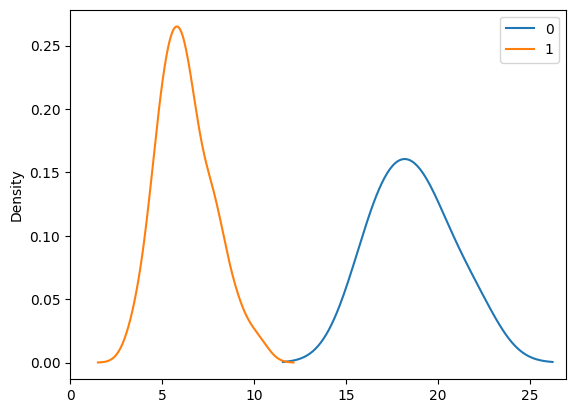

In [19]:
while True:
    model.eval()
    test_loss = 0.0
    test_running_correct = 0.0
    label_set_test = torch.tensor([],dtype=int).cuda(device)
    preds_set_test = torch.tensor([],dtype=int).cuda(device)
    for batch_idx, data in enumerate(dataloader_test):

        img, label = data 
        img = img.float()
        img = img.view(img.size(0), -1)

        if torch.cuda.is_available():
            img = img.cuda(device)
            label = label.cuda(device).float()

        recon_al,recon_be, logalpha, logbeta, z = model(img)
        monte_gamma = 0
        monte_recon_loss = 0
        for l in range(monte_number):
            z_l = model.reparametrize(logalpha, logbeta)
            m = nn.Softplus()
            recon_al_l = 1e-6 + m(model.decode(z_l)[:,:model.data_dim])
            recon_be_l = 1e-6 + m(model.decode(z_l)[:,model.data_dim:])
            monte_gamma += model.get_gamma(z_l,len(dataloader_test.dataset))
            monte_recon_loss += model.recon_loss(recon_al_l,recon_be_l, img)
        sgvb_gamma_test = monte_gamma/monte_number
        sgvb_loss_test = torch.mean(monte_recon_loss/monte_number 
                                    + model.kl_loss(sgvb_gamma_test, logalpha, logbeta,len(dataloader_test.dataset))) #+ 1*model.Loss_b(img,z, logalpha, logbeta, 2, latent_dim))

        _, preds = torch.max(sgvb_gamma_test,1)

        label_set_test = torch.cat((label_set_test,label)).int()
        preds_set_test = torch.cat((preds_set_test,preds)).int()
        test_loss += sgvb_loss_test.item() * img.size(0)


    label_set_test = label_set_test.cpu()
    preds_set_test = preds_set_test.cpu()

    test_acc = cluster_acc(preds_set_test,label_set_test) * 100/preds_set_test.shape[0]

    
    if test_acc == np.max(accuracy_list):
        print('***** Test Result: loss: {:.3f} acc: {:.4f}'
              .format(test_loss / len(dataloader_test.dataset), test_acc))



        if latent_dim!=1:


            target, label = preds_set_test.numpy(), label_set_test.numpy()
            mo = TSNE( n_components = 2, init='pca')
            #         recon_al, recon_be, logalpha, logbeta, z = model(img)
            recon_al,recon_be, logalpha, logbeta, z = model(img)
            zs_tsne = mo.fit_transform( z.data.cpu().numpy())

            plt.figure(figsize = (10, 5))
            plt.title(f'Number of plotted data : {(preds_set_test.shape)[0]}', fontsize = 15)
            cmap = plt.get_cmap("tab10")
            for t in range(5):
                points = zs_tsne[(target == t)]
                plt.scatter(points[:, 0], points[:, 1], color=cmap(t), label=str(t))
            plt.legend()
            plt.show()
            plt.close()
        else:
            target, label = preds_set_test.numpy(), label_set_test.numpy()
            recon_al, recon_be, logalpha, logbeta, z = model(img)
            cmap = plt.get_cmap("tab10")
            z_data = z.cpu().detach().numpy()

            sns.kdeplot(z_data[np.where(preds_set_test == 0)[0],0], color=cmap(0), label=str(0)).set(xlim=(0))
            sns.kdeplot(z_data[np.where(preds_set_test == 1)[0],0], color=cmap(1), label=str(1)).set(xlim=(0))
            plt.legend()
            plt.show()
            
            
        break
        


